<a href="https://colab.research.google.com/github/haritmm97/ML-Projects-Portfolio/blob/master/Capstone_Team_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Define the problem, propose solution:**

**Problem Statement:**

In the current situation, we find it difficult to predict the correct house prices. Generally, people consider the location of the house and the square foot area of the house to come up with the prices which might be inappropriate as there are lot other factors that needs to be considered when coming up with the prices. Without having much idea on factors contributing to the prices, people tend to compare the house prices in same locality to come up with the estimation price which could either too high or too low which in turn doesn’t satisfy the buyer/seller. This exercise of comparison also causes some manual effort to be spent at times which goes useless due to inaccuracies.

**Areas of improvement/Solution:**

We see a solution for getting in the features/details which are contributing to house prices using a machine learning based system which can learn using the past history of data. Also, the machine learning system can help in automating the house-based comparison process much faster than the manual work that is being done currently which would eliminate the manual task/effort spent on this. This system would help in predicting the appropriate house prices with higher accuracy compared to current system

**Findings on the data:**

We have looked into the data shared which contains various factors of houses like different housing types like 2BHK,3BHK, different floors, different square foot areas, amenities like coast & sight view, condition & quality of houses captured from different locations with prices associated to that as required.

**2.EDA and Pre-processing**

In this section,we will perform the Exploratory data analysis like checking for null value,checking & treating outliers and removing unwanted variables.We will also analyze the relationship & distribution of indepedent and target variables

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import Image
from graphviz import Source
from sklearn import tree
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Data from Google Drive**

In [4]:
#read data from csv using dataframe
dfdata = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/Capstone/innercity.csv")
dfdata.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [5]:
#Get the shape of the dataset
shape=dfdata.shape
print('shape of data :',shape)

shape of data : (21613, 23)


In [6]:
#datatype of each column of given data
datType=dfdata.dtypes
print('datatype of each col:\n',datType)

datatype of each col:
 cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object


In [7]:
#converting the dayhours to get the year and month on which it was sold
dfdata['dayhours']=dfdata['dayhours'].astype('datetime64[ns]')
dfdata['soldyr']=pd.DatetimeIndex(dfdata['dayhours']).year
dfdata['soldmonth']=pd.DatetimeIndex(dfdata['dayhours']).month
dfdata.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,11
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,12
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,4
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,5
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,4


From the above dataset,dropping off the column day hours as we have extracted the month & year from that and added a seperate column

In [8]:
#dropping dayhours column
house_data=dfdata.drop('dayhours',axis=1)
house_data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04,2014.322954,6.574423
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06,2015.000000,12.000000


**checking for presence of missing value**

In [9]:
missing_values=house_data.isnull()
print('Missing values count in datatable:\n',missing_values.sum())

Missing values count in datatable:
 cid                 0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
soldyr              0
soldmonth           0
dtype: int64


In [10]:
#five point summary
quartiles=house_data.describe(percentiles=[.25,.50,.75])
print('five point summary:\n',quartiles)

five point summary:
                 cid         price  ...        soldyr     soldmonth
count  2.161300e+04  2.161300e+04  ...  21613.000000  21613.000000
mean   4.580302e+09  5.401822e+05  ...   2014.322954      6.574423
std    2.876566e+09  3.673622e+05  ...      0.467616      3.115308
min    1.000102e+06  7.500000e+04  ...   2014.000000      1.000000
25%    2.123049e+09  3.219500e+05  ...   2014.000000      4.000000
50%    3.904930e+09  4.500000e+05  ...   2014.000000      6.000000
75%    7.308900e+09  6.450000e+05  ...   2015.000000      9.000000
max    9.900000e+09  7.700000e+06  ...   2015.000000     12.000000

[8 rows x 24 columns]


From the above,five point summary analysis,we see the most of indepedent variables are skewed.This might be due to outliers.The skewness affects the model performance adversely and hence the skewness of the data needs to be correct.For we first check for outliers & treat the outliers

Also,we see that yr_renovated seems to be 0 in most of the case eventhough there was a difference between living measure,lot measure compared to living measure15 & lot measure 15 which doesnt make sense to the dataset.Hence we can remove this column.

We can add a column to flag renovated as 1 and 0 based on difference in the area

In [11]:
#Removing yr_renovated column
house_dat=house_data.drop('yr_renovated',axis=1)
#Adding a column to flag the renovation
house_dat['renovated']=0
house_dat['renovated'].loc[((house_dat['living_measure']<house_dat['living_measure15'])|(house_dat['living_measure']>house_dat['living_measure15'])|(house_dat['lot_measure']<house_dat['lot_measure15'])|(house_dat['lot_measure']>house_dat['lot_measure15']))]=1
house_dat.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,soldyr,soldmonth,renovated
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,2120,7553,1,16477,2014,11,1
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,98023,47.3165,-122.386,2260,8800,0,10050,2014,12,1
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,98038,47.3515,-121.999,2370,4348,0,6694,2015,4,1
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,1520,3844,0,4664,2014,5,1
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,98115,47.6768,-122.269,1900,5940,0,5450,2015,4,1


Since we had a new column "renovation" to indicate whether the house was renovated or not.We can drop off living measure15 and lot measure15 columns

In [12]:
#Removing living_measure 15 and lot_measure15 columns
house_dat1=house_dat.drop(['living_measure15','lot_measure15'],axis=1)
house_dat1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,1,16477,2014,11,1
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,98023,47.3165,-122.386,0,10050,2014,12,1
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,98038,47.3515,-121.999,0,6694,2015,4,1
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,0,4664,2014,5,1
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,98115,47.6768,-122.269,0,5450,2015,4,1


Creating a new variable "cost_persqft" from "price" & "total_area". This is to calculate median cost/sqft for all zip codes and then to save in new data table.

In [0]:
#creating new variable "cost_persqft" to main df
house_dat1['cost_persqft'] = house_dat1['price']/house_dat1['total_area']

In [14]:
house_dat1['cost_persqft'].describe()

count    21613.000000
mean        59.718198
std         45.618343
min          0.163020
25%         28.129056
50%         46.853038
75%         78.007046
max        399.480351
Name: cost_persqft, dtype: float64

In [15]:
house_dat1['median_cost_persqft'] = house_dat1.groupby('zipcode')['cost_persqft'].transform(np.median)
house_dat1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated,cost_persqft,median_cost_persqft
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,1,16477,2014,11,1,49.044122,42.522548
1,8731981640,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,98023,47.3165,-122.386,0,10050,2014,12,1,27.611940,25.394897
2,5104530220,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,98038,47.3515,-121.999,0,6694,2015,4,1,60.352555,37.139234
3,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,0,4664,2014,5,1,64.322470,42.522548
4,8924100111,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,98115,47.6768,-122.269,0,5450,2015,4,1,128.256881,85.910653


**Creating new data table Median Cost Per Sqft by zipcode**

In [0]:
costpsft_zip = house_dat1[['zipcode', 'median_cost_persqft']]

In [0]:
costpsft_zip = costpsft_zip.drop_duplicates(subset='zipcode', keep="last")

In [18]:
costpsft_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 20932 to 21612
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipcode              70 non-null     int64  
 1   median_cost_persqft  70 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


Now a new data table is created with median cost per sqft. Removing cost_persqft, as this is derived from variable to be predicted

In [0]:
house_dat1=house_dat1.drop(['cost_persqft', 'median_cost_persqft'],axis=1)

In [0]:
house_dat1 = pd.merge(house_dat1, costpsft_zip, on='zipcode')

In [21]:
house_dat1.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated,median_cost_persqft
0,3034200666,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,1,16477,2014,11,1,42.522548
1,6145600285,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,0,4664,2014,5,1,42.522548
2,2419600075,465000,3,1.75,1480,6360,1.0,0,0,3,7,1480,0,1954,98133,47.7311,-122.353,0,7840,2014,12,0,42.522548
3,6895300050,529900,5,2.25,3030,9430,2.0,0,0,4,8,2600,430,1961,98133,47.7515,-122.353,0,12460,2014,10,1,42.522548
4,6300500875,385000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,98133,47.7025,-122.341,0,6600,2014,5,1,42.522548


In [22]:
#Identify unique values in each column
print('unique values in cid:',house_dat1['cid'].unique().size)
print('unique values in zipcode:',house_dat1['zipcode'].unique().size)

unique values in cid: 21436
unique values in zipcode: 70


In [0]:
#removing the cid column as it doesnt conribute to price
house_dat2=house_dat1.drop(['cid'],axis=1)

Label encoding for zip code

In [24]:
#converting the categorical variables cid & zipcode to numerical values using label encoder
#preprocess=preprocessing.LabelEncoder()
#house_dat2['cid']=preprocess.fit_transform(house_dat2.loc[:,'cid'])
#house_dat2['zipcode']=preprocess.fit_transform(house_dat2.loc[:,'zipcode'])
house_dat2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,furnished,total_area,soldyr,soldmonth,renovated,median_cost_persqft
0,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,98133,47.7174,-122.336,1,16477,2014,11,1,42.522548
1,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,98133,47.7049,-122.349,0,4664,2014,5,1,42.522548
2,465000,3,1.75,1480,6360,1.0,0,0,3,7,1480,0,1954,98133,47.7311,-122.353,0,7840,2014,12,0,42.522548
3,529900,5,2.25,3030,9430,2.0,0,0,4,8,2600,430,1961,98133,47.7515,-122.353,0,12460,2014,10,1,42.522548
4,385000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,98133,47.7025,-122.341,0,6600,2014,5,1,42.522548


In [25]:
house_dat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21613 non-null  int64  
 1   room_bed             21613 non-null  int64  
 2   room_bath            21613 non-null  float64
 3   living_measure       21613 non-null  int64  
 4   lot_measure          21613 non-null  int64  
 5   ceil                 21613 non-null  float64
 6   coast                21613 non-null  int64  
 7   sight                21613 non-null  int64  
 8   condition            21613 non-null  int64  
 9   quality              21613 non-null  int64  
 10  ceil_measure         21613 non-null  int64  
 11  basement             21613 non-null  int64  
 12  yr_built             21613 non-null  int64  
 13  zipcode              21613 non-null  int64  
 14  lat                  21613 non-null  float64
 15  long                 21613 non-null 

In [0]:
house_dat2['ceil'] = pd.Categorical(house_dat2.ceil)
house_dat2['coast'] = pd.Categorical(house_dat2.coast)
house_dat2['sight'] = pd.Categorical(house_dat2.sight)
house_dat2['condition'] = pd.Categorical(house_dat2.condition)
house_dat2['quality'] = pd.Categorical(house_dat2.quality)
house_dat2['furnished'] = pd.Categorical(house_dat2.furnished)
house_dat2['renovated'] = pd.Categorical(house_dat2.renovated)
house_dat2['zipcode'] = pd.Categorical(house_dat2.zipcode)

In [0]:
house_dat2.drop(["soldyr", "soldmonth", "lat", "long"], axis = 1, inplace = True)

In [28]:
house_dat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                21613 non-null  int64   
 1   room_bed             21613 non-null  int64   
 2   room_bath            21613 non-null  float64 
 3   living_measure       21613 non-null  int64   
 4   lot_measure          21613 non-null  int64   
 5   ceil                 21613 non-null  category
 6   coast                21613 non-null  category
 7   sight                21613 non-null  category
 8   condition            21613 non-null  category
 9   quality              21613 non-null  category
 10  ceil_measure         21613 non-null  int64   
 11  basement             21613 non-null  int64   
 12  yr_built             21613 non-null  int64   
 13  zipcode              21613 non-null  category
 14  furnished            21613 non-null  category
 15  total_area         

In [0]:
house_dat2['current_yr'] = 2015

In [30]:
# creating "house_age" feature by subracting yr_built to 2015
house_dat2['house_old'] = house_dat2['current_yr'] - house_dat2['yr_built']
house_dat2.drop(["current_yr", "yr_built"], axis = 1, inplace = True)
house_dat2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,zipcode,furnished,total_area,renovated,median_cost_persqft,house_old
0,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,98133,1,16477,1,42.522548,59
1,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,98133,0,4664,1,42.522548,99
2,465000,3,1.75,1480,6360,1.0,0,0,3,7,1480,0,98133,0,7840,0,42.522548,61
3,529900,5,2.25,3030,9430,2.0,0,0,4,8,2600,430,98133,0,12460,1,42.522548,54
4,385000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,98133,0,6600,1,42.522548,68


**Adding ZipCode**

Created additional data based on zip codes

In [31]:
df_zip = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/Capstone/zipcode3.csv")
df_zip.head()

,zipcode,region,Total_population,Housing_units,Density,White_Population,Median_Income,link1,link2
0,98133,Seattle,"44,555","21,903","6,275.35","28,217","50,960",https://www.uszip.com/zip/,https://www.uszip.com/zip/98133
1,98023,Federal Way,"47,510","18,026","4,603.68","26,315","66,438",https://www.uszip.com/zip/,https://www.uszip.com/zip/98023
2,98038,Maple Valley,"31,171","11,387",468.81,"26,315","97,593",https://www.uszip.com/zip/,https://www.uszip.com/zip/98038
3,98115,Seattle,"46,206","21,623","7,022.19","36,621","82,654",https://www.uszip.com/zip/,https://www.uszip.com/zip/98115
4,98059,Renton,"34,463","13,004","1,724.87","21,550","87,581",https://www.uszip.com/zip/,https://www.uszip.com/zip/98059


In [0]:
df_zip.drop(["region", "link1", "link2"], axis = 1, inplace = True)

In [33]:
df_zip.head()

,zipcode,Total_population,Housing_units,Density,White_Population,Median_Income
0,98133,"44,555","21,903","6,275.35","28,217","50,960"
1,98023,"47,510","18,026","4,603.68","26,315","66,438"
2,98038,"31,171","11,387",468.81,"26,315","97,593"
3,98115,"46,206","21,623","7,022.19","36,621","82,654"
4,98059,"34,463","13,004","1,724.87","21,550","87,581"


In [34]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   zipcode           70 non-null     int64 
 1   Total_population  70 non-null     object
 2   Housing_units     70 non-null     object
 3   Density           70 non-null     object
 4   White_Population  70 non-null     object
 5   Median_Income     70 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.4+ KB


In [0]:
df_zip["Total_population"] = df_zip["Total_population"].str.replace(",","").astype(float)
df_zip["Housing_units"] = df_zip["Housing_units"].str.replace(",","").astype(float)
df_zip["Density"] = df_zip["Density"].str.replace(",","").astype(float)
df_zip["White_Population"] = df_zip["White_Population"].str.replace(",","").astype(float)
df_zip["Median_Income"] = df_zip["Median_Income"].str.replace(",","").astype(float)

In [36]:
df_zip.head()

,zipcode,Total_population,Housing_units,Density,White_Population,Median_Income
0,98133,44555.0,21903.0,6275.35,28217.0,50960.0
1,98023,47510.0,18026.0,4603.68,26315.0,66438.0
2,98038,31171.0,11387.0,468.81,26315.0,97593.0
3,98115,46206.0,21623.0,7022.19,36621.0,82654.0
4,98059,34463.0,13004.0,1724.87,21550.0,87581.0


In [0]:
df_zip['white_perc'] = df_zip['White_Population']/df_zip['Total_population']
df_zip['per_capita_house'] = df_zip['Housing_units']/df_zip['Total_population']

In [38]:
df_zip.head()

,zipcode,Total_population,Housing_units,Density,White_Population,Median_Income,white_perc,per_capita_house
0,98133,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595
1,98023,47510.0,18026.0,4603.68,26315.0,66438.0,0.553883,0.379415
2,98038,31171.0,11387.0,468.81,26315.0,97593.0,0.844214,0.365307
3,98115,46206.0,21623.0,7022.19,36621.0,82654.0,0.792559,0.467970
4,98059,34463.0,13004.0,1724.87,21550.0,87581.0,0.625308,0.377332


In [0]:
house_dat2 = pd.merge(house_dat2, df_zip, on='zipcode')

In [40]:
house_dat2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,zipcode,furnished,total_area,renovated,median_cost_persqft,house_old,Total_population,Housing_units,Density,White_Population,Median_Income,white_perc,per_capita_house
0,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,98133,1,16477,1,42.522548,59,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595
1,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,98133,0,4664,1,42.522548,99,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595
2,465000,3,1.75,1480,6360,1.0,0,0,3,7,1480,0,98133,0,7840,0,42.522548,61,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595
3,529900,5,2.25,3030,9430,2.0,0,0,4,8,2600,430,98133,0,12460,1,42.522548,54,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595
4,385000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,98133,0,6600,1,42.522548,68,44555.0,21903.0,6275.35,28217.0,50960.0,0.633307,0.491595


In [0]:
house_dat2.drop(["Total_population", "Housing_units", "White_Population"], axis = 1, inplace = True)

In [0]:
house_dat2['zipcode'] = pd.Categorical(house_dat2.zipcode)

In [43]:
house_dat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                21613 non-null  int64   
 1   room_bed             21613 non-null  int64   
 2   room_bath            21613 non-null  float64 
 3   living_measure       21613 non-null  int64   
 4   lot_measure          21613 non-null  int64   
 5   ceil                 21613 non-null  category
 6   coast                21613 non-null  category
 7   sight                21613 non-null  category
 8   condition            21613 non-null  category
 9   quality              21613 non-null  category
 10  ceil_measure         21613 non-null  int64   
 11  basement             21613 non-null  int64   
 12  zipcode              21613 non-null  category
 13  furnished            21613 non-null  category
 14  total_area           21613 non-null  int64   
 15  renovated          

In [0]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in house_dat2.columns:
    if house_dat2[i].dtype in numeric_dtypes:
        numeric.append(i)

In [45]:
house_dat2[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21613 non-null  int64  
 1   room_bed             21613 non-null  int64  
 2   room_bath            21613 non-null  float64
 3   living_measure       21613 non-null  int64  
 4   lot_measure          21613 non-null  int64  
 5   ceil_measure         21613 non-null  int64  
 6   basement             21613 non-null  int64  
 7   total_area           21613 non-null  int64  
 8   median_cost_persqft  21613 non-null  float64
 9   house_old            21613 non-null  int64  
 10  Density              21613 non-null  float64
 11  Median_Income        21613 non-null  float64
 12  white_perc           21613 non-null  float64
 13  per_capita_house     21613 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 2.5 MB


In [46]:
house_dat2[numeric].head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil_measure,basement,total_area,median_cost_persqft,house_old,Density,Median_Income,white_perc,per_capita_house
0,808100,4,3.25,3020,13457,3020,0,16477,42.522548,59,6275.35,50960.0,0.633307,0.491595
1,300000,2,1.00,820,3844,820,0,4664,42.522548,99,6275.35,50960.0,0.633307,0.491595
2,465000,3,1.75,1480,6360,1480,0,7840,42.522548,61,6275.35,50960.0,0.633307,0.491595
3,529900,5,2.25,3030,9430,2600,430,12460,42.522548,54,6275.35,50960.0,0.633307,0.491595
4,385000,4,1.75,1620,4980,860,760,6600,42.522548,68,6275.35,50960.0,0.633307,0.491595


In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X1=house_dat2.drop('price',axis=1) #Indepedent feature columns
y1=house_dat2['price'] # dependent feature column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs         Score
3           lot_measure  3.119557e+08
13           total_area  2.831815e+08
18        Median_Income  4.578212e+07
17              Density  3.356609e+07
2        living_measure  5.345972e+06
9          ceil_measure  4.218997e+06
10             basement  3.803564e+06
15  median_cost_persqft  1.533128e+05
16            house_old  8.454712e+04
6                 sight  1.564297e+04


In [0]:
from scipy.stats import zscore

In [0]:
house_dat2[numeric] = house_dat2[numeric].apply(zscore)

In [50]:
house_dat2[numeric].head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil_measure,basement,total_area,median_cost_persqft,house_old,Density,Median_Income,white_perc,per_capita_house
0,0.729318,0.676485,1.474063,1.023606,-0.039835,1.487322,-0.658681,-0.017069,-0.398495,0.510853,0.182109,-1.261171,-0.264245,0.940347
1,-0.653817,-1.473959,-1.447464,-1.371813,-0.271924,-1.169453,-0.658681,-0.301116,-0.398495,1.872660,0.182109,-1.261171,-0.264245,0.940347
2,-0.204659,-0.398737,-0.473621,-0.653187,-0.211180,-0.372420,-0.658681,-0.224748,-0.398495,0.578943,0.182109,-1.261171,-0.264245,0.940347
3,-0.027990,1.751707,0.175607,1.034495,-0.137060,0.980119,0.312928,-0.113659,-0.398495,0.340627,0.182109,-1.261171,-0.264245,0.940347
4,-0.422433,0.676485,-0.473621,-0.500751,-0.244497,-1.121148,1.058582,-0.254565,-0.398495,0.817259,0.182109,-1.261171,-0.264245,0.940347


In [51]:
house_dat2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,zipcode,furnished,total_area,renovated,median_cost_persqft,house_old,Density,Median_Income,white_perc,per_capita_house
0,0.729318,0.676485,1.474063,1.023606,-0.039835,1.0,0,0,5,9,1.487322,-0.658681,98133,1,-0.017069,1,-0.398495,0.510853,0.182109,-1.261171,-0.264245,0.940347
1,-0.653817,-1.473959,-1.447464,-1.371813,-0.271924,1.0,0,0,4,6,-1.169453,-0.658681,98133,0,-0.301116,1,-0.398495,1.872660,0.182109,-1.261171,-0.264245,0.940347
2,-0.204659,-0.398737,-0.473621,-0.653187,-0.211180,1.0,0,0,3,7,-0.372420,-0.658681,98133,0,-0.224748,0,-0.398495,0.578943,0.182109,-1.261171,-0.264245,0.940347
3,-0.027990,1.751707,0.175607,1.034495,-0.137060,2.0,0,0,4,8,0.980119,0.312928,98133,0,-0.113659,1,-0.398495,0.340627,0.182109,-1.261171,-0.264245,0.940347
4,-0.422433,0.676485,-0.473621,-0.500751,-0.244497,1.0,0,0,4,7,-1.121148,1.058582,98133,0,-0.254565,1,-0.398495,0.817259,0.182109,-1.261171,-0.264245,0.940347


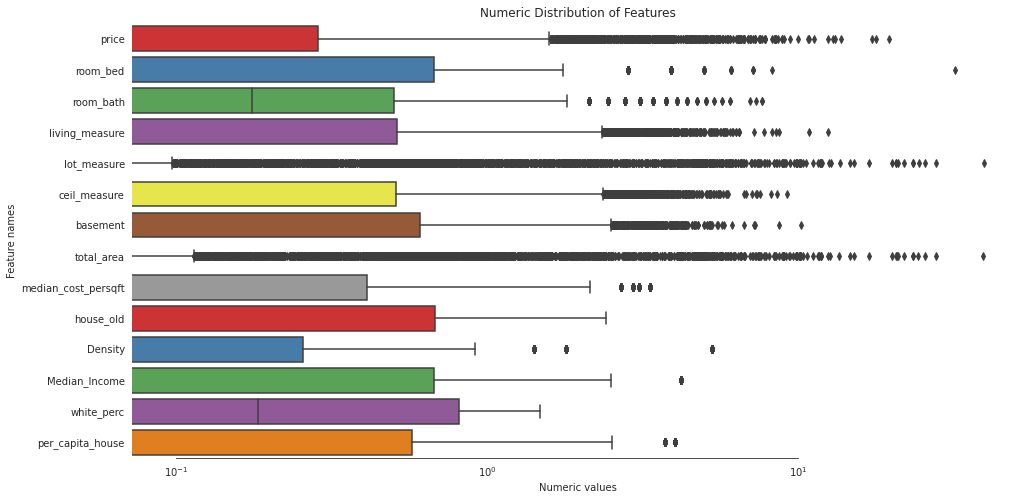

In [52]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xscale("log")
ax = sns.boxplot(data=house_dat2[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

**Studying relationship of target/other variable in the given data set using pair plot**

In [0]:
#sns.pairplot(housedat_scaled_z,diag_kind = 'kde')
#plt.show

Inference from the above plot:
Price seems to have linearity relationship with room_bed,room_bath,living measure,quality,ceil measure but doesnt have any linearity with other attributes and price is highly distributed in the range of 1000000 - 2000000

In [0]:
from sklearn.model_selection import train_test_split
X=house_dat2.drop('price',axis=1) #Indepedent feature columns
y=house_dat2['price'] # dependent feature column
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**3.Model building**

In the below section,we will evaluate the performance of the different models on the dataset.We will analyse the score of each model and find the best fit regressor for this pricing model

**Linear Regression model**

In [0]:
from sklearn.linear_model import LinearRegression
#fit the model on training data
linmodel= LinearRegression()
linmodel.fit(x_train,y_train)
#predict using test
y_predict=linmodel.predict(x_test)
#predict using training data
y_predict_trn=linmodel.predict(x_train)

In [56]:
#linear regression model score
model_score_trn=linmodel.score(x_train,y_train)
print("Linear regresion model score using training data:",model_score_trn)
model_score=linmodel.score(x_test,y_test)
print("Linear regresion model score using test data:",model_score)

Linear regresion model score using training data: 0.7576215075228538
Linear regresion model score using test data: 0.7597195612769381


In [0]:
#RMSE of linear regression model
from sklearn.metrics import mean_squared_error 
RMSE_lin=np.sqrt(mean_squared_error(y_test,y_predict))

In [0]:
#creating a dataframe to track the performance of each model
data={'Model':[],'Traindata_score':[],'Testdata_score':[],'RMSE':[]}
Perf_metric=pd.DataFrame(data)
Perf_metric.loc[0]=['Linear regression',model_score_trn,model_score,RMSE_lin]

**Polynomial Regression model**

In [0]:
#since not all other independent variables are linear with the target(pricing)>we apply polynomial features as data is non linear
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
polymodel = PolynomialFeatures(degree=2,interaction_only=True)
poly_x_train = polymodel.fit_transform(x_train)
poly_x_test = polymodel.fit_transform(x_test)
linear_polymodel = linear_model.LinearRegression()
linear_polymodel.fit(poly_x_train,y_train)
#predict using test
poly_y_predict=linear_polymodel.predict(poly_x_test)
#predict using training data
poly_y_predict_trn=linear_polymodel.predict(poly_x_train)

In [60]:
#polynomial regression model score
model_score_polytrn=linear_polymodel.score(poly_x_train,y_train)
print("Polynomial regresion model score using training data:",model_score_polytrn)
model_score_poly=linear_polymodel.score(poly_x_test,y_test)
print("Polynomial regresion model score using test data:",model_score_poly)

Polynomial regresion model score using training data: 0.8809290330108911
Polynomial regresion model score using test data: 0.8718794021889589


In [0]:
#RMSE of polynomial regression model
rmse_poly=np.sqrt(mean_squared_error(y_test,poly_y_predict))
Perf_metric.loc[1]=['Polynomial regression',model_score_polytrn,model_score_poly,rmse_poly]

**K- Nearest Neighbor regression model**

In [0]:
##KNN regressor model
from sklearn.neighbors import KNeighborsRegressor
#fit the model on training data
knnmodel=KNeighborsRegressor(n_neighbors=5)
knnmodel.fit(x_train,y_train)
#predict using training data
y_predict_knn_trn=knnmodel.predict(x_train)
#predict using test
y_predict_knn=knnmodel.predict(x_test)

In [63]:
#K-NN model model score
knnmodel_score_trn=knnmodel.score(x_train,y_train)
print("K-NN model score using training data:",knnmodel_score_trn)
knnmodel_score=knnmodel.score(x_test,y_test)
print("K-NN model score using test data:",knnmodel_score)

K-NN model score using training data: 0.8796736582646276
K-NN model score using test data: 0.770519065442888


In [0]:
#RMSE of KNN regression model
rmse_knn=np.sqrt(mean_squared_error(y_test,y_predict_knn))
Perf_metric.loc[2]=['KNN regression',knnmodel_score_trn,knnmodel_score,rmse_knn]

**Decision Tree**

In [65]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dTree=DecisionTreeRegressor(criterion='mse',random_state=1)
dTree.fit(x_train,y_train)
#predict using test data
y_predict_dtree=dTree.predict(x_test)
#decision tree score
print("Decision Tree score for training dataset:",dTree.score(x_train,y_train))
print("Decision Tree score for test dataset:",dTree.score(x_test,y_test))

Decision Tree score for training dataset: 0.9993464076273418
Decision Tree score for test dataset: 0.7545662120456776


In [0]:
#RMSE of dtree regression model
rmse_dtree=np.sqrt(mean_squared_error(y_test,y_predict_dtree))
Perf_metric.loc[4]=['Decision tree',dTree.score(x_train,y_train),dTree.score(x_test,y_test),rmse_dtree]

**Feature selection based on feature importance**

In [67]:
# Get feature importance
feature_importances = dTree.feature_importances_
print (pd.DataFrame(feature_importances, columns = ["Imp"], index = x_train.columns))

                          Imp
room_bed             0.005896
room_bath            0.008781
living_measure       0.246299
lot_measure          0.015292
ceil                 0.003403
coast                0.017791
sight                0.036219
condition            0.005367
quality              0.348822
ceil_measure         0.026066
basement             0.005209
zipcode              0.009124
furnished            0.000000
total_area           0.015792
renovated            0.000229
median_cost_persqft  0.193568
house_old            0.023920
Density              0.004966
Median_Income        0.010102
white_perc           0.010333
per_capita_house     0.012821


From the above analysis on feature importance,we see that renovated,soldyr,ceil are of least important.Hence we will evaluate the performance by dropping these column

**Decision tree regressor after feature selection**

In [68]:
#Dropping renovated,soldyr,ceil and predicting using decision tree
X2 = house_dat2.drop(['price', 'ceil', 'renovated'],axis=1) 
y2 = house_dat2['price']
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=1)
dTree.fit(x2_train,y2_train)
#predict using test data
y2_predict_dtree=dTree.predict(x2_test)
#predict using train data
y2_predict_dtree_train=dTree.predict(x2_train)
#decision tree score
print("Decision Tree score for training dataset:",dTree.score(x2_train,y2_train))
print("Decision Tree score for test dataset:",dTree.score(x2_test,y2_test))

Decision Tree score for training dataset: 0.9993447407649222
Decision Tree score for test dataset: 0.7437326452306068


In [0]:
#RMSE of dtree after feature selection model
rmse_dtree_fs=np.sqrt(mean_squared_error(y2_test,y2_predict_dtree))
Perf_metric.loc[5]=['Decisiontree_featuresel',dTree.score(x2_train,y2_train),dTree.score(x2_test,y2_test),rmse_dtree_fs]

**Ensemble Techniques**

In below selection,we evaluate by applying different ensemble techniques like bagging,boosting & random forest to improve the performance of model.

From the base model analysis,decision tree seems to perform well compared to other models and hence we apply ensemble technique on top of decision tree

**Applying bagging on top of decision tree**

In [70]:
#Bagging
from sklearn.ensemble import BaggingRegressor
bgc=BaggingRegressor(base_estimator=dTree,n_estimators=10,random_state=1)
bgc.fit(x2_train,y2_train)
#predict using test data
bgc_predict=bgc.predict(x2_test)
#accuracy score
print("Bagging regressor score for test dataset:",bgc.score(x2_test,y2_test))
print("Bagging regressor score for training dataset:",bgc.score(x2_train,y2_train))

Bagging regressor score for test dataset: 0.8578604803486115
Bagging regressor score for training dataset: 0.9712082771819583


In [71]:
#RMSE of bagging regression model
rmse_bagging=np.sqrt(mean_squared_error(y2_test,bgc_predict))
Perf_metric.loc[6]=['Bagging_DecTree',bgc.score(x2_train,y2_train),bgc.score(x2_test,y2_test),rmse_bagging]
Perf_metric

,Model,Traindata_score,Testdata_score,RMSE
0,Linear regression,0.757622,0.759720,0.506025
1,Polynomial regression,0.880929,0.871879,0.369506
2,KNN regression,0.879674,0.770519,0.494522
4,Decision tree,0.999346,0.754566,0.511422
5,Decisiontree_featuresel,0.999345,0.743733,0.522588
6,Bagging_DecTree,0.971208,0.857860,0.389197


**Applying Adaboost on top of decision tree**

In [72]:
#AdaBoosting
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(base_estimator=dTree,n_estimators=10,random_state=1)
abc.fit(x2_train,y2_train)
#predict using test data
abc_predict=abc.predict(x2_test)
#accuracy score
print("Adaboost regressor score for test dataset:",abc.score(x2_test,y2_test))
print("Adaboost regressor score for training dataset:",abc.score(x2_train,y2_train))

Adaboost regressor score for test dataset: 0.8445630878235476
Adaboost regressor score for training dataset: 0.9979655653579335


In [0]:
#RMSE of boosting regression model
rmse_boosting=np.sqrt(mean_squared_error(y2_test,abc_predict))
Perf_metric.loc[7]=['Boosting_DecTree',abc.score(x2_train,y2_train),abc.score(x2_test,y2_test),rmse_boosting]

**Applying GradientBoost on top of decision tree**

In [74]:
#GradientBoost
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(init=dTree,n_estimators=10,random_state=1)
gbc.fit(x2_train,y2_train)
#predict using test data
gbc_predict=gbc.predict(x2_test)
#accuracy score
print("GradientBoost regressor score for test dataset:",gbc.score(x2_test,y2_test))
print("GradientBoost regressor score for training dataset:",gbc.score(x2_train,y2_train))

GradientBoost regressor score for test dataset: 0.7437326136605313
GradientBoost regressor score for training dataset: 0.9993447407745691


In [0]:
#RMSE of gradient boosting regression model
rmse_gradboosting=np.sqrt(mean_squared_error(y2_test,gbc_predict))
Perf_metric.loc[8]=['GradBoosting_DecTree',gbc.score(x2_train,y2_train),gbc.score(x2_test,y2_test),rmse_gradboosting]

**Applying random forest regressor on top of decision tree**

In [0]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1],
                  'randomforestregressor__min_samples_split': [2, 5],
                  'randomforestregressor__min_samples_leaf': [10, 5]}

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(RandomForestRegressor(n_estimators=50))

In [0]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [79]:
#Cross Validation to find best parameters
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
# Fit and tune model
clf.fit(x2_train,y2_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                     

In [80]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__min_samples_split': 5}

In [81]:
clf.best_score_

0.8557045204976556

In [82]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=5, min_samples_split=5,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [83]:
#Quick check accuracy of the model after CV
score = clf.score(x2_train,y2_train)
print(score)

0.9310278430974706


In [84]:
#Quick check accuracy of the model
score = clf.score(x2_test,y2_test)
print(score)

0.85748416493712


In [0]:
RF_predictions = clf.predict(x2_test)

In [86]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y2_test,RF_predictions))

0.3897122012249083

In [87]:
#accuracy score
print("RandomForest regressor score for test dataset:",clf.score(x2_test,y2_test))
print("RandomForest regressor score for training dataset:",clf.score(x2_train,y2_train))

RandomForest regressor score for test dataset: 0.85748416493712
RandomForest regressor score for training dataset: 0.9310278430974706


In [0]:
#RMSE of random forest regression model
rmse_ranforest=np.sqrt(mean_squared_error(y2_test,RF_predictions))
Perf_metric.loc[9]=['RandomForest_DecTree',clf.score(x2_train,y2_train),clf.score(x2_test,y2_test),rmse_ranforest]

**Inference on Performance of the models**

In [89]:
Perf_metric

,Model,Traindata_score,Testdata_score,RMSE
0,Linear regression,0.757622,0.759720,0.506025
1,Polynomial regression,0.880929,0.871879,0.369506
2,KNN regression,0.879674,0.770519,0.494522
4,Decision tree,0.999346,0.754566,0.511422
5,Decisiontree_featuresel,0.999345,0.743733,0.522588
6,Bagging_DecTree,0.971208,0.857860,0.389197
7,Boosting_DecTree,0.997966,0.844563,0.406995
8,GradBoosting_DecTree,0.999345,0.743733,0.522588
9,RandomForest_DecTree,0.931028,0.857484,0.389712
